# import Library

In [626]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random as rd
import warnings
warnings.filterwarnings('ignore')

# Mengolah Data

Membaca Data

In [627]:
cards = pd.read_csv('DataSet/cards.csv')
cards_filtering = cards[['id', 'name', 'type', 'atk', 'def', 'level']]

Filter Data Normal Monster

In [628]:
normal_monster_cards = cards_filtering[cards_filtering['type'] == 'Normal Monster']
normal_monster_cards.shape

(653, 6)

# Kondisi Permainan

Kondisi field Musuh

In [629]:
monster_field_musuh = []
max_total_atk_musuh = 0
max_total_def_musuh = 0

for x in range(6):
    normal_monster_cards_training = rd.randrange(0, 130)
    normal_monster_cards_testing = rd.randrange(131, 653)
    if len(monster_field_musuh) < 6 :
        prob = rd.randrange(1, 10)
        if prob >= 6 :
            #data_number = normal_monster_cards_training
            data_number = normal_monster_cards_testing
            monster_field_musuh.append(normal_monster_cards.iloc[data_number])

for x in monster_field_musuh:
    temp_atk = x['atk']
    max_total_atk_musuh = max(max_total_atk_musuh, temp_atk)

for x in monster_field_musuh:
    temp_def = x['def']
    max_total_def_musuh = max(max_total_def_musuh, temp_def)

print("Max Atk Field Musuh = ", max_total_atk_musuh)
print("Max def Field Musuh = ",max_total_def_musuh)
print("Banyak Kartu pada field monster Musuh = ", len(monster_field_musuh))
print(monster_field_musuh)

Max Atk Field Musuh =  1800.0
Max def Field Musuh =  2000.0
Banyak Kartu pada field monster Musuh =  3
[id               549481
name        Prevent Rat
type     Normal Monster
atk               500.0
def              2000.0
level               4.0
Name: 7637, dtype: object, id                          7459013
name     Zure, Knight of Dark World
type                 Normal Monster
atk                          1800.0
def                          1500.0
level                           4.0
Name: 11170, dtype: object, id                          47879985
name     Guardian of the Throne Room
type                  Normal Monster
atk                           1650.0
def                           1600.0
level                            4.0
Name: 4495, dtype: object]


Kondisi field Pemain

In [630]:
monster_field_pemain = []
max_total_atk_pemain = 0
max_total_def_pemain = 0

for x in range(6):
    normal_monster_cards_training = rd.randrange(0, 130)
    normal_monster_cards_testing = rd.randrange(131, 653)
    
    if len(monster_field_pemain) < 6 :
        prob = rd.randrange(1, 10)
        if prob >= 6 :
            #data_number = normal_monster_cards_training
            data_number = normal_monster_cards_testing
            monster_field_pemain.append(normal_monster_cards.iloc[data_number])

for x in monster_field_pemain:
    temp_atk = x['atk']
    max_total_atk_pemain = max(max_total_atk_pemain, temp_atk)

for x in monster_field_pemain:
    temp_def = x['def']
    max_total_def_pemain = max(max_total_def_pemain, temp_def)

print("Max Atk Field Pemain = ", max_total_atk_pemain)
print("Max def Field pemain = ",max_total_def_pemain)        
print("Banyak Kartu pada field monster Pemain = ", len(monster_field_pemain))
print(monster_field_pemain)

Max Atk Field Pemain =  2000.0
Max def Field pemain =  1700.0
Banyak Kartu pada field monster Pemain =  4
[id                   33734439
name     Three-Legged Zombies
type           Normal Monster
atk                    1100.0
def                     800.0
level                     3.0
Name: 9905, dtype: object, id             69780745
name             Garvas
type     Normal Monster
atk              2000.0
def              1700.0
level               6.0
Name: 3900, dtype: object, id             81618817
name      Lord of Zemia
type     Normal Monster
atk              1300.0
def              1000.0
level               4.0
Name: 5685, dtype: object, id             53776525
name           Gigobyte
type     Normal Monster
atk               350.0
def               300.0
level               1.0
Name: 4121, dtype: object]


Kondisi tangan Pemain

In [631]:
banyak_kartu_pemain = rd.randrange(1, 7)
kartu_tangan_pemain = []
kartu_tangan_pemain_aktif = []

for x in range(banyak_kartu_pemain):
    normal_monster_cards_training = rd.randrange(0, 130)
    normal_monster_cards_testing = rd.randrange(131, 653)
    
    #data_number = normal_monster_cards_training
    data_number = normal_monster_cards_testing
    kartu_tangan_pemain.append(normal_monster_cards.iloc[data_number])

print("Banyak Kartu tangan pemain = ", len(kartu_tangan_pemain))
print(kartu_tangan_pemain)


Banyak Kartu tangan pemain =  2
[id                   66602787
name     Saggi the Dark Clown
type           Normal Monster
atk                     600.0
def                    1500.0
level                     3.0
Name: 8346, dtype: object, id             66672569
name      Dragon Zombie
type     Normal Monster
atk              1600.0
def                 0.0
level               3.0
Name: 2780, dtype: object]


Kartu Tangan yang aktif

In [632]:
for x in kartu_tangan_pemain:
    if (x['level'] >= 5 and x['level'] < 7) and len(monster_field_pemain) >= 1 :
        kartu_tangan_pemain_aktif.append(x)
    if x['level'] >= 7 and len(monster_field_pemain) >= 2 :
        kartu_tangan_pemain_aktif.append(x)
    if x['level'] <= 4 :
        kartu_tangan_pemain_aktif.append(x)
         
print("Banyak Kartu tangan aktif = ", len(kartu_tangan_pemain_aktif))
print(kartu_tangan_pemain_aktif)

Banyak Kartu tangan aktif =  2
[id                   66602787
name     Saggi the Dark Clown
type           Normal Monster
atk                     600.0
def                    1500.0
level                     3.0
Name: 8346, dtype: object, id             66672569
name      Dragon Zombie
type     Normal Monster
atk              1600.0
def                 0.0
level               3.0
Name: 2780, dtype: object]


# Mendefinisikan Semesta

In [633]:
atk_field_musuh = ctrl.Antecedent(np.arange(0, 3001, 1), 'Atk Field Musuh')
def_field_musuh = ctrl.Antecedent(np.arange(0, 3001, 1), 'Def Field Musuh')
atk_field_pemain = ctrl.Antecedent(np.arange(0, 3001, 1), 'Atk Field Pemain')
def_field_pemain = ctrl.Antecedent(np.arange(0, 3001, 1), 'Def Field Pemain')
atk_monster = ctrl.Consequent(np.arange(0, 3001, 1), 'Atk Monster')
def_monster = ctrl.Consequent(np.arange(0, 3001, 1), 'Def Monster')

# Membership Function

In [634]:
atk_field_musuh['lemah'] = fuzz.trapmf(atk_field_musuh.universe, [0, 0, 500, 1500])
atk_field_musuh['sedang'] = fuzz.trimf(atk_field_musuh.universe, [500, 1500, 2500])
atk_field_musuh['kuat'] = fuzz.trapmf(atk_field_musuh.universe, [1500, 2500, 3000, 3000])

In [635]:
def_field_musuh['lemah'] = fuzz.trapmf(def_field_musuh.universe, [0, 0, 500, 1500])
def_field_musuh['sedang'] = fuzz.trimf(def_field_musuh.universe, [500, 1500, 2500])
def_field_musuh['kuat'] = fuzz.trapmf(def_field_musuh.universe, [1500, 2500, 3000, 3000])

In [636]:
atk_field_pemain['lemah'] = fuzz.trapmf(atk_field_pemain.universe, [0, 0, 500, 1500])
atk_field_pemain['sedang'] = fuzz.trimf(atk_field_pemain.universe, [500, 1500, 2500])
atk_field_pemain['kuat'] = fuzz.trapmf(atk_field_pemain.universe, [1500, 2500, 3000, 3000])

In [637]:
def_field_pemain['lemah'] = fuzz.trapmf(def_field_pemain.universe, [0, 0, 500, 1500])
def_field_pemain['sedang'] = fuzz.trimf(def_field_pemain.universe, [500, 1500, 2500])
def_field_pemain['kuat'] = fuzz.trapmf(def_field_pemain.universe, [1500, 2500, 3000, 3000])

In [638]:
atk_monster['rendah'] = fuzz.trapmf(atk_monster.universe, [0, 0, 500, 2500])
atk_monster['tinggi'] = fuzz.trapmf(atk_monster.universe, [500, 2500, 3000, 3000])

In [639]:
def_monster['rendah'] = fuzz.trapmf(def_monster.universe, [0, 0, 500, 2500])
def_monster['tinggi'] = fuzz.trapmf(def_monster.universe, [500, 2500, 3000, 3000])

Tampilan Membership

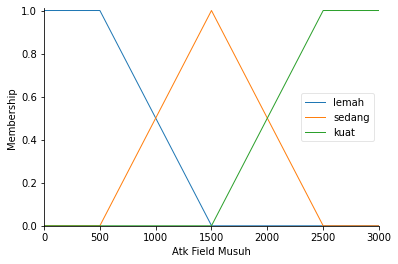

In [640]:
atk_field_musuh.view()

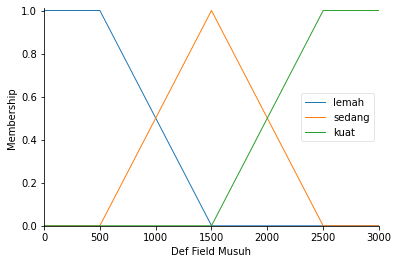

In [641]:
def_field_musuh.view()

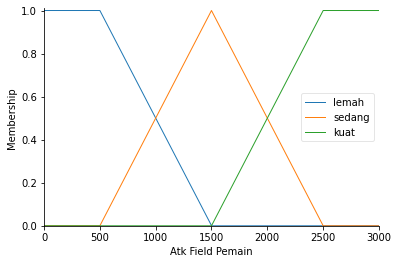

In [642]:
atk_field_pemain.view()

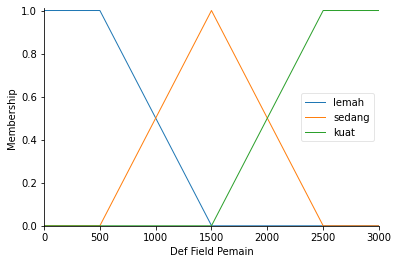

In [643]:
def_field_pemain.view()

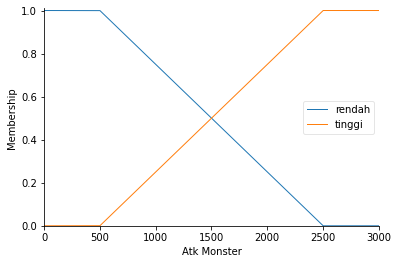

In [644]:
atk_monster.view()

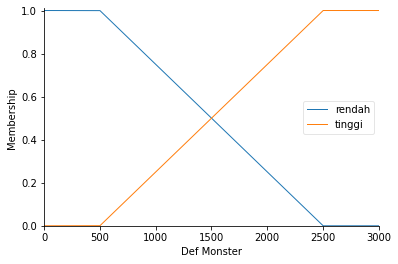

In [645]:
def_monster.view()

# Definisi Rule

In [646]:
rule1 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['lemah'] & atk_field_pemain['lemah'] & def_field_pemain['lemah'], atk_monster['rendah'])
rule2 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['lemah'] & atk_field_pemain['lemah'] & def_field_pemain['lemah'], def_monster['rendah'])
rule3 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['lemah'] & atk_field_pemain['lemah'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule4 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['lemah'] & atk_field_pemain['lemah'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule5 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['lemah'] & atk_field_pemain['lemah'] & def_field_pemain['kuat'], atk_monster['rendah'])
rule6 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['lemah'] & atk_field_pemain['lemah'] & def_field_pemain['kuat'], def_monster['rendah'])
rule7 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['lemah'] & atk_field_pemain['sedang'] & def_field_pemain['lemah'], atk_monster['tinggi'])
rule8 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['lemah'] & atk_field_pemain['sedang'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule9 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['lemah'] & atk_field_pemain['sedang'] & def_field_pemain['kuat'], atk_monster['tinggi'])
rule10 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['lemah'] & atk_field_pemain['kuat'] & def_field_pemain['lemah'], atk_monster['rendah'])
rule11 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['lemah'] & atk_field_pemain['kuat'] & def_field_pemain['lemah'], def_monster['rendah'])
rule12 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['lemah'] & atk_field_pemain['kuat'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule13 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['lemah'] & atk_field_pemain['kuat'] & def_field_pemain['sedang'], def_monster['rendah'])
rule14 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['lemah'] & atk_field_pemain['kuat'] & def_field_pemain['kuat'], atk_monster['rendah'])
rule15 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['lemah'] & atk_field_pemain['kuat'] & def_field_pemain['kuat'], def_monster['rendah'])
rule16 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['sedang'] & atk_field_pemain['lemah'] & def_field_pemain['lemah'], atk_monster['rendah'])
rule17 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['sedang'] & atk_field_pemain['lemah'] & def_field_pemain['lemah'], def_monster['rendah'])
rule18 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['sedang'] & atk_field_pemain['lemah'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule19 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['sedang'] & atk_field_pemain['lemah'] & def_field_pemain['kuat'], atk_monster['rendah'])
rule20 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['sedang'] & atk_field_pemain['lemah'] & def_field_pemain['kuat'], def_monster['rendah'])
rule21 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['sedang'] & atk_field_pemain['sedang'] & def_field_pemain['lemah'], atk_monster['tinggi'])
rule22 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['sedang'] & atk_field_pemain['sedang'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule23 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['sedang'] & atk_field_pemain['sedang'] & def_field_pemain['kuat'], atk_monster['tinggi'])
rule24 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['sedang'] & atk_field_pemain['kuat'] & def_field_pemain['lemah'], atk_monster['rendah'])
rule25 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['sedang'] & atk_field_pemain['kuat'] & def_field_pemain['lemah'], def_monster['rendah'])
rule26 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['sedang'] & atk_field_pemain['kuat'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule27 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['sedang'] & atk_field_pemain['kuat'] & def_field_pemain['kuat'], atk_monster['rendah'])
rule28 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['sedang'] & atk_field_pemain['kuat'] & def_field_pemain['kuat'], def_monster['rendah'])
rule29 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['kuat'] & atk_field_pemain['lemah'] & def_field_pemain['lemah'], def_monster['rendah'])
rule30 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['kuat'] & atk_field_pemain['lemah'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule31 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['kuat'] & atk_field_pemain['lemah'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule32 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['kuat'] & atk_field_pemain['lemah'] & def_field_pemain['kuat'], atk_monster['rendah'])
rule33 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['kuat'] & atk_field_pemain['lemah'] & def_field_pemain['kuat'], def_monster['rendah'])
rule34 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['kuat'] & atk_field_pemain['sedang'] & def_field_pemain['lemah'], atk_monster['tinggi'])
rule35 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['kuat'] & atk_field_pemain['sedang'] & def_field_pemain['lemah'], def_monster['tinggi'])
rule36 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['kuat'] & atk_field_pemain['sedang'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule37 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['kuat'] & atk_field_pemain['sedang'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule38 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['kuat'] & atk_field_pemain['sedang'] & def_field_pemain['kuat'], atk_monster['tinggi'])
rule39 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['kuat'] & atk_field_pemain['kuat'] & def_field_pemain['lemah'], atk_monster['rendah'])
rule40 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['kuat'] & atk_field_pemain['kuat'] & def_field_pemain['lemah'], def_monster['rendah'])
rule41 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['kuat'] & atk_field_pemain['kuat'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule42 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['kuat'] & atk_field_pemain['kuat'] & def_field_pemain['kuat'], atk_monster['rendah'])
rule43 = ctrl.Rule(atk_field_musuh['lemah'] & def_field_musuh['kuat'] & atk_field_pemain['kuat'] & def_field_pemain['kuat'], def_monster['rendah'])
rule44 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['lemah'] & atk_field_pemain['lemah'] & def_field_pemain['lemah'], def_monster['rendah'])
rule45 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['lemah'] & atk_field_pemain['lemah'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule46 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['lemah'] & atk_field_pemain['lemah'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule47 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['lemah'] & atk_field_pemain['lemah'] & def_field_pemain['kuat'], def_monster['rendah'])
rule48 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['lemah'] & atk_field_pemain['sedang'] & def_field_pemain['lemah'], atk_monster['tinggi'])
rule49 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['lemah'] & atk_field_pemain['sedang'] & def_field_pemain['lemah'], def_monster['rendah'])
rule50 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['lemah'] & atk_field_pemain['sedang'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule51 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['lemah'] & atk_field_pemain['sedang'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule52 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['lemah'] & atk_field_pemain['sedang'] & def_field_pemain['kuat'], atk_monster['tinggi'])
rule53 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['lemah'] & atk_field_pemain['kuat'] & def_field_pemain['lemah'], atk_monster['rendah'])
rule54 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['lemah'] & atk_field_pemain['kuat'] & def_field_pemain['lemah'], def_monster['tinggi'])
rule55 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['lemah'] & atk_field_pemain['kuat'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule56 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['lemah'] & atk_field_pemain['kuat'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule57 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['lemah'] & atk_field_pemain['kuat'] & def_field_pemain['kuat'], atk_monster['rendah'])
rule58 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['lemah'] & atk_field_pemain['kuat'] & def_field_pemain['kuat'], def_monster['rendah'])
rule59 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['sedang'] & atk_field_pemain['lemah'] & def_field_pemain['lemah'], def_monster['rendah'])
rule60 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['sedang'] & atk_field_pemain['lemah'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule61 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['sedang'] & atk_field_pemain['lemah'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule62 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['sedang'] & atk_field_pemain['lemah'] & def_field_pemain['kuat'], atk_monster['tinggi'])
rule63 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['sedang'] & atk_field_pemain['lemah'] & def_field_pemain['kuat'], def_monster['rendah'])
rule64 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['sedang'] & atk_field_pemain['sedang'] & def_field_pemain['lemah'], atk_monster['tinggi'])
rule65 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['sedang'] & atk_field_pemain['sedang'] & def_field_pemain['lemah'], def_monster['tinggi'])
rule66 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['sedang'] & atk_field_pemain['sedang'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule67 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['sedang'] & atk_field_pemain['sedang'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule68 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['sedang'] & atk_field_pemain['sedang'] & def_field_pemain['kuat'], atk_monster['tinggi'])
rule69 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['sedang'] & atk_field_pemain['kuat'] & def_field_pemain['lemah'], def_monster['rendah'])
rule70 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['sedang'] & atk_field_pemain['kuat'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule71 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['sedang'] & atk_field_pemain['kuat'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule72 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['sedang'] & atk_field_pemain['kuat'] & def_field_pemain['kuat'], atk_monster['rendah'])
rule73 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['sedang'] & atk_field_pemain['kuat'] & def_field_pemain['kuat'], def_monster['rendah'])
rule74 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['kuat'] & atk_field_pemain['lemah'] & def_field_pemain['lemah'], def_monster['rendah'])
rule75 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['kuat'] & atk_field_pemain['lemah'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule76 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['kuat'] & atk_field_pemain['lemah'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule77 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['kuat'] & atk_field_pemain['lemah'] & def_field_pemain['kuat'], def_monster['rendah'])
rule78 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['kuat'] & atk_field_pemain['sedang'] & def_field_pemain['lemah'], atk_monster['tinggi'])
rule79 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['kuat'] & atk_field_pemain['sedang'] & def_field_pemain['lemah'], def_monster['tinggi'])
rule80 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['kuat'] & atk_field_pemain['sedang'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule81 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['kuat'] & atk_field_pemain['sedang'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule82 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['kuat'] & atk_field_pemain['sedang'] & def_field_pemain['kuat'], atk_monster['tinggi'])
rule83 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['kuat'] & atk_field_pemain['kuat'] & def_field_pemain['lemah'], def_monster['tinggi'])
rule84 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['kuat'] & atk_field_pemain['kuat'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule85 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['kuat'] & atk_field_pemain['kuat'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule86 = ctrl.Rule(atk_field_musuh['sedang'] & def_field_musuh['kuat'] & atk_field_pemain['kuat'] & def_field_pemain['kuat'], def_monster['rendah'])
rule87 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['lemah'] & atk_field_pemain['lemah'] & def_field_pemain['lemah'], def_monster['rendah'])
rule88 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['lemah'] & atk_field_pemain['lemah'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule89 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['lemah'] & atk_field_pemain['lemah'] & def_field_pemain['kuat'], atk_monster['tinggi'])
rule90 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['lemah'] & atk_field_pemain['lemah'] & def_field_pemain['kuat'], def_monster['rendah'])
rule91 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['lemah'] & atk_field_pemain['sedang'] & def_field_pemain['lemah'], def_monster['tinggi'])
rule92 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['lemah'] & atk_field_pemain['sedang'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule93 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['lemah'] & atk_field_pemain['sedang'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule94 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['lemah'] & atk_field_pemain['sedang'] & def_field_pemain['kuat'], atk_monster['tinggi'])
rule95 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['lemah'] & atk_field_pemain['sedang'] & def_field_pemain['kuat'], def_monster['tinggi'])
rule96 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['lemah'] & atk_field_pemain['kuat'] & def_field_pemain['lemah'], def_monster['rendah'])
rule97 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['lemah'] & atk_field_pemain['kuat'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule98 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['lemah'] & atk_field_pemain['kuat'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule99 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['lemah'] & atk_field_pemain['kuat'] & def_field_pemain['kuat'], atk_monster['tinggi'])
rule100 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['lemah'] & atk_field_pemain['kuat'] & def_field_pemain['kuat'], def_monster['rendah'])
rule101 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['sedang'] & atk_field_pemain['lemah'] & def_field_pemain['lemah'], def_monster['rendah'])
rule102 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['sedang'] & atk_field_pemain['lemah'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule103 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['sedang'] & atk_field_pemain['lemah'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule104 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['sedang'] & atk_field_pemain['lemah'] & def_field_pemain['kuat'], atk_monster['tinggi'])
rule105 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['sedang'] & atk_field_pemain['lemah'] & def_field_pemain['kuat'], def_monster['rendah'])
rule106 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['sedang'] & atk_field_pemain['sedang'] & def_field_pemain['lemah'], atk_monster['tinggi'])
rule107 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['sedang'] & atk_field_pemain['sedang'] & def_field_pemain['lemah'], def_monster['tinggi'])
rule108 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['sedang'] & atk_field_pemain['sedang'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule109 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['sedang'] & atk_field_pemain['sedang'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule110 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['sedang'] & atk_field_pemain['sedang'] & def_field_pemain['kuat'], atk_monster['tinggi'])
rule111 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['sedang'] & atk_field_pemain['sedang'] & def_field_pemain['kuat'], def_monster['tinggi'])
rule112 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['sedang'] & atk_field_pemain['kuat'] & def_field_pemain['lemah'], atk_monster['tinggi'])
rule113 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['sedang'] & atk_field_pemain['kuat'] & def_field_pemain['lemah'], def_monster['rendah'])
rule114 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['sedang'] & atk_field_pemain['kuat'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule115 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['sedang'] & atk_field_pemain['kuat'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule116 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['sedang'] & atk_field_pemain['kuat'] & def_field_pemain['kuat'], atk_monster['tinggi'])
rule117 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['sedang'] & atk_field_pemain['kuat'] & def_field_pemain['kuat'], def_monster['rendah'])
rule118 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['kuat'] & atk_field_pemain['lemah'] & def_field_pemain['lemah'], def_monster['rendah'])
rule119 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['kuat'] & atk_field_pemain['lemah'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule120 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['kuat'] & atk_field_pemain['lemah'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule121 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['kuat'] & atk_field_pemain['lemah'] & def_field_pemain['kuat'], atk_monster['tinggi'])
rule122 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['kuat'] & atk_field_pemain['lemah'] & def_field_pemain['kuat'], def_monster['tinggi'])
rule123 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['kuat'] & atk_field_pemain['sedang'] & def_field_pemain['lemah'], def_monster['tinggi'])
rule124 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['kuat'] & atk_field_pemain['sedang'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule125 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['kuat'] & atk_field_pemain['sedang'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule126 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['kuat'] & atk_field_pemain['sedang'] & def_field_pemain['kuat'], atk_monster['tinggi'])
rule127 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['kuat'] & atk_field_pemain['sedang'] & def_field_pemain['kuat'], def_monster['tinggi'])
rule128 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['kuat'] & atk_field_pemain['kuat'] & def_field_pemain['lemah'], atk_monster['tinggi'])
rule129 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['kuat'] & atk_field_pemain['kuat'] & def_field_pemain['lemah'], def_monster['rendah'])
rule130 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['kuat'] & atk_field_pemain['kuat'] & def_field_pemain['sedang'], atk_monster['tinggi'])
rule131 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['kuat'] & atk_field_pemain['kuat'] & def_field_pemain['sedang'], def_monster['tinggi'])
rule132 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['kuat'] & atk_field_pemain['kuat'] & def_field_pemain['kuat'], atk_monster['tinggi'])
rule133 = ctrl.Rule(atk_field_musuh['kuat'] & def_field_musuh['kuat'] & atk_field_pemain['kuat'] & def_field_pemain['kuat'], def_monster['tinggi'])

In [647]:
output_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13,
rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29,
rule30, rule31, rule32, rule33, rule34, rule35, rule36, rule37, rule38, rule39, rule40, rule41, rule42, rule43, rule44, rule45,
rule46, rule47, rule48, rule49, rule50, rule51, rule52, rule53, rule54, rule55, rule56, rule57, rule58, rule59, rule60, rule61,
rule62, rule63, rule64, rule65, rule66, rule67, rule68, rule69, rule70, rule71, rule72, rule73, rule74, rule75, rule76, rule77,
rule78, rule79, rule80, rule81, rule82, rule83, rule84, rule85, rule86, rule87, rule89, rule90, rule91, rule92, rule93, rule94,
rule95, rule96, rule97, rule98, rule99, rule100, rule101, rule102, rule103, rule104, rule105, rule106, rule107, rule108, rule109,
rule110, rule111, rule112, rule113, rule114, rule115, rule116, rule117, rule118, rule119, rule120, rule121, rule122, rule123,
rule124, rule125, rule126, rule127, rule128, rule129, rule130, rule131, rule132, rule133])

output_kartu_pemain = ctrl.ControlSystemSimulation(output_ctrl)

# Input Data

In [648]:
output_kartu_pemain.input['Atk Field Musuh'] = max_total_atk_musuh
output_kartu_pemain.input['Def Field Musuh'] = max_total_def_musuh
output_kartu_pemain.input['Atk Field Pemain'] = max_total_atk_pemain
output_kartu_pemain.input['Def Field Pemain'] = max_total_def_pemain
output_kartu_pemain.compute()

# Output Defuzzifikasi

1780.2631578947396
1780.2631578947396


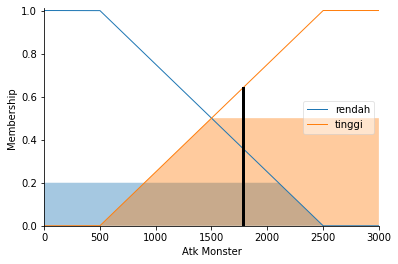

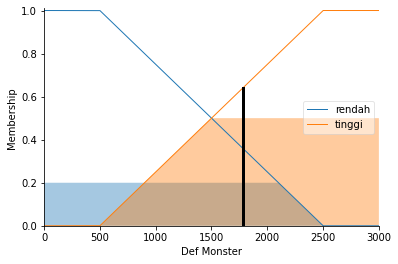

In [649]:
print(output_kartu_pemain.output['Atk Monster'])
print(output_kartu_pemain.output['Def Monster'])
atk_monster.view(sim=output_kartu_pemain)
def_monster.view(sim=output_kartu_pemain)

# Output Kartu 

In [650]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

array_atk = []
array_def = []

for x in kartu_tangan_pemain_aktif :
    atk_monster_tangan = x['atk']
    print("atk = ",atk_monster_tangan)
    array_atk.append(atk_monster_tangan)

for x in kartu_tangan_pemain_aktif :
    def_monster_tangan = x['def']
    print("def = ",def_monster_tangan)
    array_def.append(def_monster_tangan)  

output_kartu_atk = find_nearest(array_atk, output_kartu_pemain.output['Atk Monster'])
output_kartu_def = find_nearest(array_def, output_kartu_pemain.output['Def Monster'])
print("Output kartu Atk = ", output_kartu_atk)
print("Output kartu Def = ", output_kartu_def)

atk =  600.0
atk =  1600.0
def =  1500.0
def =  0.0
Output kartu Atk =  1600.0
Output kartu Def =  1500.0


In [651]:
for x in kartu_tangan_pemain_aktif :
    if x['atk'] == output_kartu_atk :
        print("Kartu dengan Atk Posisi :")
        print(x)
    


Kartu dengan Atk Posisi :
id             66672569
name      Dragon Zombie
type     Normal Monster
atk              1600.0
def                 0.0
level               3.0
Name: 2780, dtype: object


In [652]:
for x in kartu_tangan_pemain_aktif :
    if x['def'] == output_kartu_def :
        print("Kartu dengan Def Posisi :")
        print(x)
    

Kartu dengan Def Posisi :
id                   66602787
name     Saggi the Dark Clown
type           Normal Monster
atk                     600.0
def                    1500.0
level                     3.0
Name: 8346, dtype: object
